In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\saite\AppData\Local\Temp\ipykernel_27600\960858711.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
data[(data['v1'] == 'spam') & (data['Unnamed: 2'].notnull())]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s...",just as a shop has to give a guarantee on wha...,NaN,NaN
3640,spam,You can stop further club tones by replying \S...,"PO Box 1146 MK45 2WT (2/3)""",NaN,NaN


In [7]:
data[(data['v1'] == 'spam') & (data['Unnamed: 3'].notnull())]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN


In [8]:
data[(data['v1'] == 'spam') & (data['Unnamed: 4'].notnull())]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4


In [9]:
data[data['Unnamed: 4'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [10]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [12]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
data.rename(columns = {"v1":"is_spam","v2":"sms"},inplace=True)
data

,is_spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
label = LabelEncoder()
data["is_spam"] = label.fit_transform(data['is_spam'])
data

,is_spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
data.duplicated().sum()

403

In [16]:
data = data.drop_duplicates(keep="first")

In [17]:
data.shape

(5169, 2)

In [18]:
data.duplicated().sum(0)

0

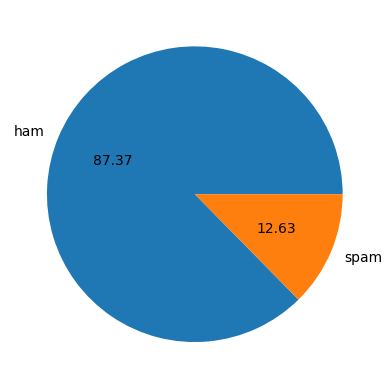

In [19]:
plt.pie(data['is_spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saite\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data.loc[:, "num_char"] = data["sms"].apply(len)

C:\Users\saite\AppData\Local\Temp\ipykernel_27600\1107019429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "num_char"] = data["sms"].apply(len)


In [22]:
data

,is_spam,sms,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
data.loc[:, "num_words"] = data["sms"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\saite\AppData\Local\Temp\ipykernel_27600\3134912264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "num_words"] = data["sms"].apply(lambda x: len(nltk.word_tokenize(x)))


In [24]:
data

,is_spam,sms,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
data.loc[:, "num_sen"] = data["sms"].apply(lambda x: len(nltk.sent_tokenize(x)))
data

C:\Users\saite\AppData\Local\Temp\ipykernel_27600\3359581622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "num_sen"] = data["sms"].apply(lambda x: len(nltk.sent_tokenize(x)))


,is_spam,sms,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [26]:
data.describe()

,is_spam,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
data["is_spam"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: is_spam, Length: 5169, dtype: int32

In [28]:
data[data['is_spam'] == 0].describe()

,is_spam,num_char,num_words,num_sen
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


C:\Users\saite\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saite\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_char', ylabel='Count'>

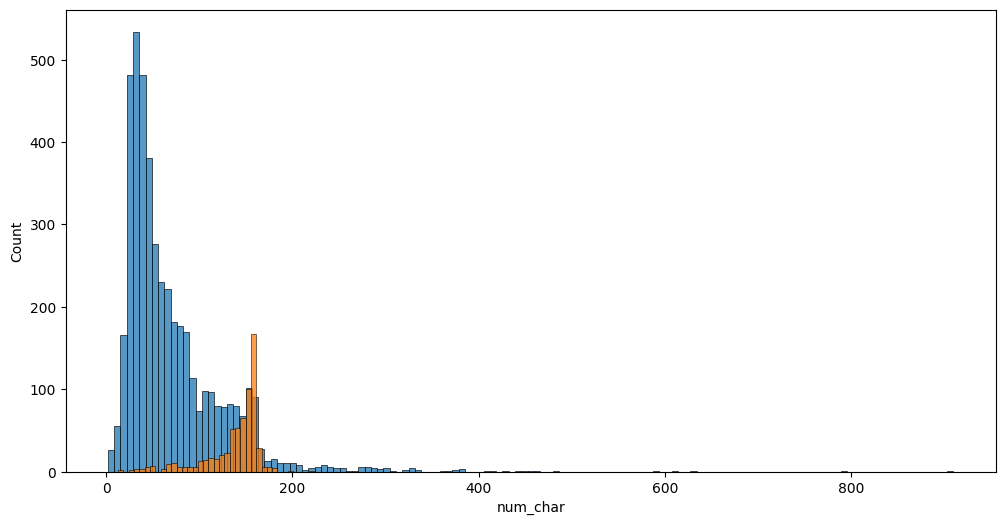

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['is_spam'] == 0]['num_char'])
sns.histplot(data[data['is_spam'] == 1]['num_char'])


<Axes: >

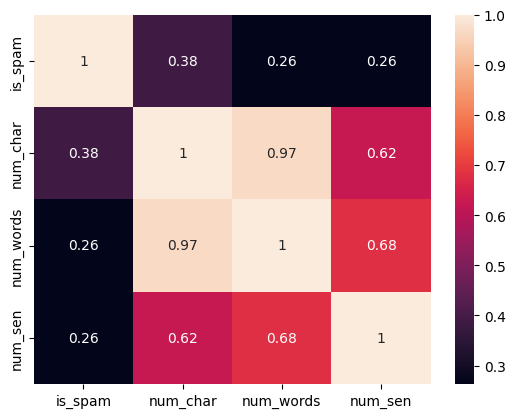

In [30]:
sns.heatmap(data.drop(columns=["sms"]).corr(),annot=True)

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dacing")

'dace'

In [39]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
           
    return y
    

In [40]:
data["transformed_text"] = data["sms"].apply(transform_text)

C:\Users\saite\AppData\Local\Temp\ipykernel_27600\3874027377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transformed_text"] = data["sms"].apply(transform_text)


In [41]:
data["transformed_text"]

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: transformed_text, Length: 5169, dtype: object

In [42]:
data["transformed_text"] = data["transformed_text"].astype(str)

C:\Users\saite\AppData\Local\Temp\ipykernel_27600\32751047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transformed_text"] = data["transformed_text"].astype(str)


In [43]:
# WORD CLOUD
from wordcloud import WordCloud
wc = WordCloud(width=800,height=400,min_font_size=10,background_color='white')

In [44]:
spam_wc=wc.generate(data[data["is_spam"]==1]["transformed_text"].str.cat(sep=" "))

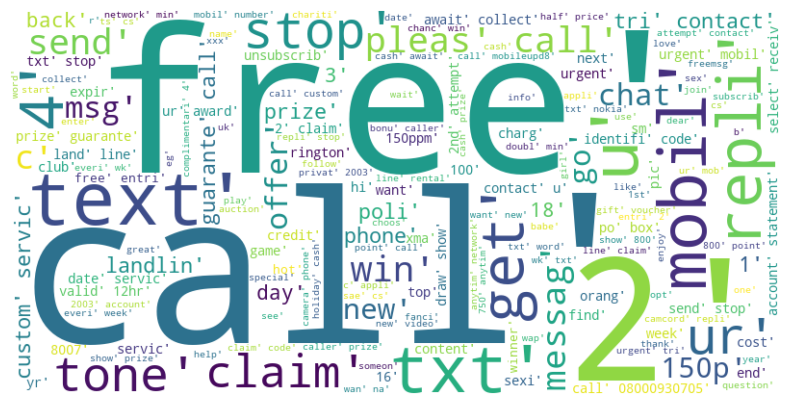

In [45]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
ham_wc=wc.generate(data[data["is_spam"]==0]["transformed_text"].str.cat(sep=" "))

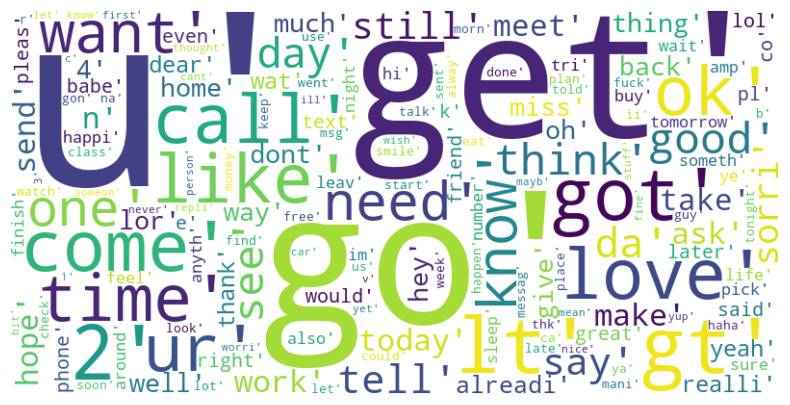

In [47]:
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
# To get the top 30 used in the spam
spam_corpus = []
for msg in data[data['is_spam'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

In [50]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[("'call',", 305),
 ("'free',", 158),
 ("'2',", 154),
 ("'txt',", 137),
 ("'text',", 118),
 ("'mobil',", 106),
 ("'u',", 99),
 ("'repli',", 99),
 ("'ur',", 99),
 ("'claim',", 96),
 ("'4',", 96),
 ("'stop',", 90),
 ("'prize',", 78),
 ("'get',", 65),
 ("'tone',", 61),
 ("'servic',", 60),
 ("'new',", 58),
 ("'send',", 57),
 ("'nokia',", 55),
 ("'contact',", 53),
 ("'award',", 52),
 ("'phone',", 52),
 ("'cash',", 48),
 ("['urgent',", 48),
 ("'week',", 47),
 ("'pleas',", 44),
 ("'collect',", 43),
 ("'win',", 41),
 ("'min',", 41),
 ("'c',", 38)]

In [51]:
ham_corpus = []
for msg in data[data['is_spam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35413

In [53]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[("'u',", 717),
 ("'go',", 353),
 ("'get',", 295),
 ("'lt',", 271),
 ("'2',", 270),
 ("'gt',", 242),
 ("'come',", 205),
 ("'like',", 196),
 ("'got',", 186),
 ("'ur',", 185),
 ("'time',", 175),
 ("'know',", 173),
 ("'want',", 169),
 ("'call',", 168),
 ("'love',", 166),
 ("'4',", 150),
 ("'good',", 146),
 ("'need',", 143),
 ("'day',", 139),
 ("'one',", 133),
 ("'take',", 120),
 ("'n',", 118),
 ("'make',", 116),
 ("'still',", 116),
 ("'see',", 116),
 ("'lor',", 110),
 ("'home',", 109),
 ("['u',", 106),
 ("'say',", 105),
 ("['ok',", 103)]

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [56]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
X.shape

(5169, 3000)

In [58]:
y = data['is_spam'].values

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss,precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("loss :",log_loss(y_test,y_pred1))
print("precision_score :",precision_score(y_test,y_pred1))
print("Classification Report :",classification_report(y_test,y_pred1))

Accuracy Score 0.8694390715667312
[[788 108]
 [ 27 111]]
loss : 4.7058928506100735
precision_score : 0.5068493150684932
Classification Report :               precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [63]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("loss :",log_loss(y_test,y_pred2))
print("precision_score :",precision_score(y_test,y_pred2))
print("Classification Report :",classification_report(y_test,y_pred2))

Accuracy Score 0.9709864603481625
[[896   0]
 [ 30 108]]
loss : 1.0457539668022386
precision_score : 1.0
Classification Report :               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))